# Requirements

In [1]:
from pandas.core.interchange.dataframe_protocol import DataFrame
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--incognito')  # This enables incognito mod

# Simple Usage

In [3]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [4]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

In [5]:
# Print the page source code.
print(browser.page_source)

<html lang="en-US" theme="light" data-color-scheme="light" class="desktop neo-green dock-upscale"><head><script charset="UTF-8" type="text/javascript" async="async" src="https://cdn.taboola.com/libtrc/google-topics-api.20241106-7-RELEASE.es6.js"></script><script charset="UTF-8" type="text/javascript" src="https://cdn.taboola.com/libtrc/impl.20241106-7-RELEASE.js"></script><script type="text/javascript" async="" src="//pm-widget.taboola.com/yahooweb-network/load.js"></script>
        <meta charset="utf-8">
        <meta name="oath:guce:consent-host" content="guce.yahoo.com">
        <link rel="preconnect" href="//s.yimg.com" crossorigin="anonymous"><link rel="preconnect" href="//geo.yahoo.com"><link rel="preconnect" href="//query1.finance.yahoo.com"><link rel="preconnect" href="//query2.finance.yahoo.com"><link rel="preconnect" href="//consent.cmp.oath.com"><link rel="preload" href="/__rapidworker-1.2.js" as="worker"><link rel="preconnect" href="https://s.yimg.com/uc/finance/webcore/js/

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

<>:26: SyntaxWarning: invalid escape sequence '\$'
<>:26: SyntaxWarning: invalid escape sequence '\$'
/var/folders/vw/vz2n89y934nd5kyv4k0r6f980000gn/T/ipykernel_27081/364300509.py:26: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)


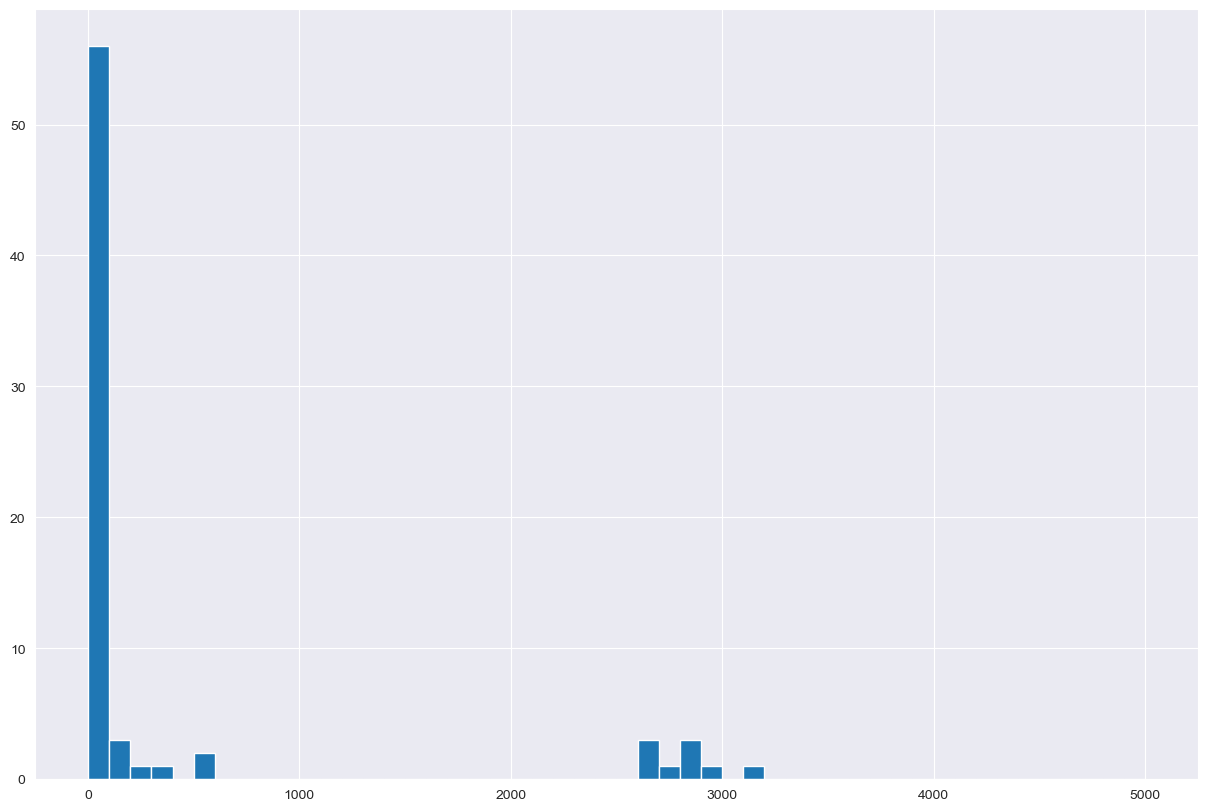

In [6]:
from matplotlib import pyplot as plt

# Write your code here.
listCoins = []
URL = "https://finance.yahoo.com/markets/crypto/all/"
#https://finance.yahoo.com/markets/crypto/all/?start=0&count=25
ctr=0
while True:
    if ctr>50:break
    browser.get(URL+f"?start={ctr}&count=25")
    rows = browser.find_elements(By.CSS_SELECTOR,".body>.row")
    i=ctr
    for row in rows:
        name = row.find_element(By.CSS_SELECTOR,".name").text
        # print(name.text)
        price = row.find_element(By.CSS_SELECTOR,"td:nth-child(4) > span > fin-streamer").text
        # print(price.text)
        cap = row.find_element(By.CSS_SELECTOR,"td:nth-child(7) > span > fin-streamer").text
        # print(cap.text)
        listCoins.append({"Name":name,"Price":price,"Market Cap":cap})
        # print(i,name,price,cap)
        i+=1
    ctr+=25

df = pd.DataFrame(listCoins)
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
plt.figure(figsize=(15, 10)) 
plt.hist(df['Price'], bins=50,range=(0, 5000))
# plt.xscale('log')
plt.show() #go pokazuva

In [7]:
# Add as many code boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [8]:
# Write your code here.
browser.get(URL)
BTC = browser.find_element(By.CSS_SELECTOR,"#\\30  > td:nth-child(1) > span > div > a")
BTC.click()
hyst_data = browser.find_element(By.LINK_TEXT,"Historical Data")
hyst_data.click()

KeyboardInterrupt: 

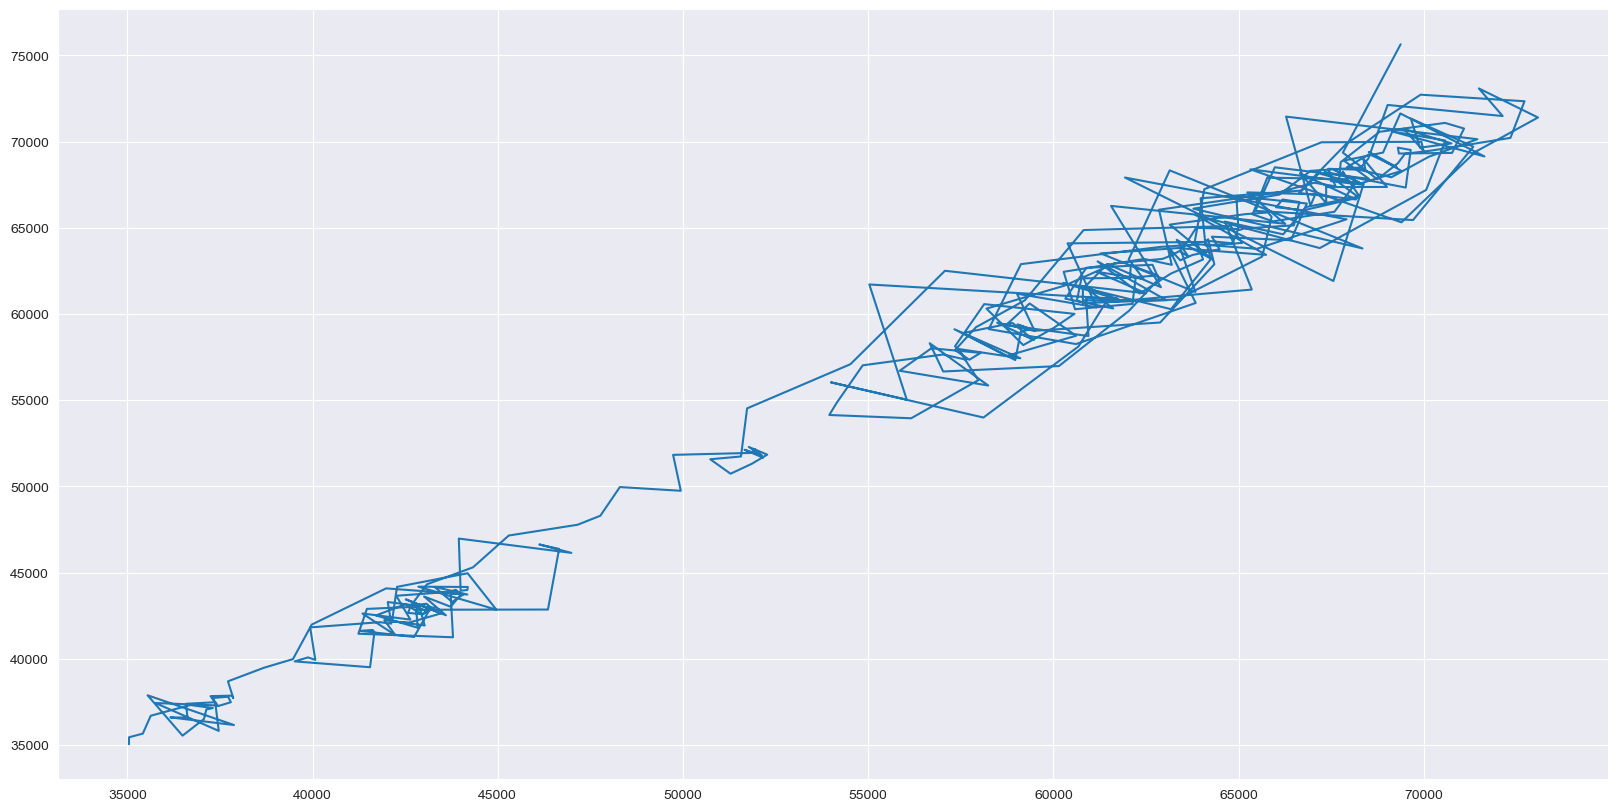

In [80]:
table_rows = browser.find_elements(By.CSS_SELECTOR,"#nimbus-app > section > section > section > article > div.container > div.table-container.yf-h2urb6 > table > tbody > .yf-h2urb6")

data = []
for row in table_rows:
    date = row.find_element(By.CSS_SELECTOR,"td:nth-child(1)").text
    price = float(row.find_element(By.CSS_SELECTOR,"td:nth-child(2)").text.replace(",",""))
    volume = float(row.find_element(By.CSS_SELECTOR,"td:nth-child(6)").text.replace(",",""))
    data.append({"DATE":date,"PRICE":price,"MARKET CAP":volume})
    
df = pd.DataFrame(data)
plt.figure(figsize=(20,10)) 
df.sort_values("MARKET CAP")
plt.plot(df['PRICE'], df['MARKET CAP'])
plt.show()
    
